https://www.kaggle.com/datasets/shebrahimi/financial-distress

Content

First column: Company represents sample companies.

Second column: Time shows different time periods that data belongs to. Time series length varies between 1 to 14 for each company.

Third column: The target variable is denoted by "Financial Distress" if it is greater than -0.50 the company should be considered as healthy (0). Otherwise, it would be regarded as financially distressed (1).

Fourth column to the last column: The features denoted by x1 to x83, are some financial and non-financial characteristics of the sampled companies. These features belong to the previous time period, which should be used to predict whether the company will be financially distressed or not (classification). Feature x80 is a categorical variable.

For example, company 1 is financially distressed at time 4 but company 2 is still healthy at time 14.

This data set is imbalanced (there are 136 financially distressed companies against 286 healthy ones i.e., 136 firm-year observations are financially distressed while 3546 firm-year observations are healthy) and skewed, so f-score should be employed as the performance evaluation criterion.

20% of this data set should be randomly assigned as hold-out test set so the remaining 70% is used for feature selection and model selection i.e., train set.

Note: 
1- This data could be viewed as a classification problem.
2- This data could also be considered as a regression problem and then the result will be converted into a classification.
3- This data could be regarded as a multivariate time series classification.

Inspiration

Which features are most indicative of financial distress?

What types of machine learning models perform best on this dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/alexvalles/Financial Distress.csv')
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [4]:
df.dtypes

Company                 int64
Time                    int64
Financial Distress    float64
x1                    float64
x2                    float64
                       ...   
x79                   float64
x80                     int64
x81                   float64
x82                     int64
x83                     int64
Length: 86, dtype: object

In [5]:
df.isnull().sum()

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64

In [6]:
df = df.drop_duplicates()

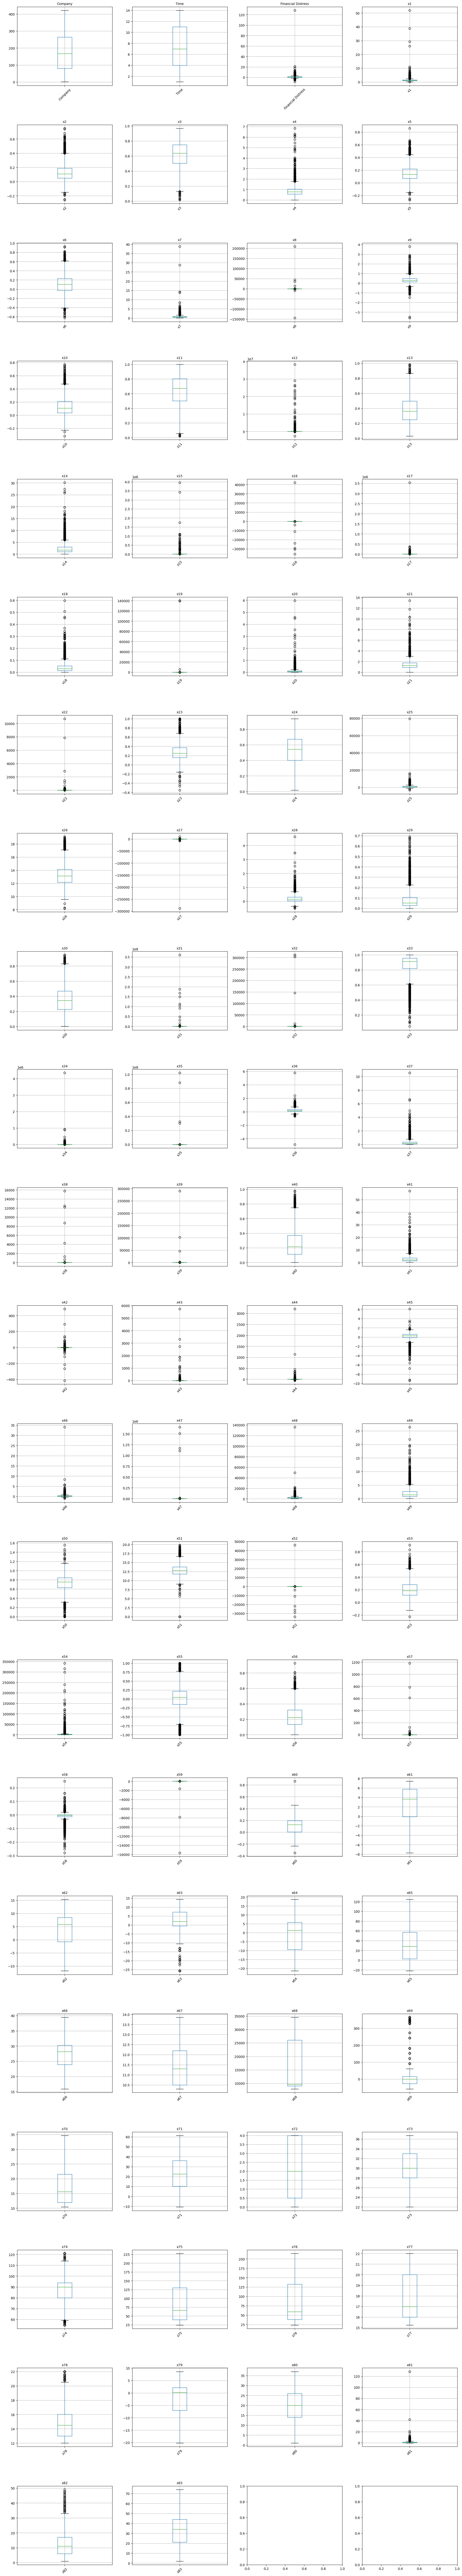

In [7]:
import math
import matplotlib.pyplot as plt

# Calculamos el número de filas y columnas para el layout
num_variables = df.shape[1]
num_cols = 4  # Puedes ajustar esto según tu preferencia
num_rows = math.ceil(num_variables / num_cols)

# Creamos los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
fig.tight_layout(pad=3.0)

# Iteramos sobre todas las variables para crear los boxplots
for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    df.boxplot(column=column, ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar solapamientos
plt.subplots_adjust(hspace=0.5)
plt.show()


In [8]:
x80 = df['x80']

In [9]:
x80.unique()

array([22, 29, 25, 12, 23,  9, 28, 14, 11, 18, 26, 21,  3, 20, 15,  7, 24,
       19, 27,  1,  4, 17,  6,  8,  5,  2, 16, 13, 10, 30, 31, 32, 34, 35,
       36, 33, 37])

In [10]:
# hacemos one hot encoding de la variable x80
df = pd.get_dummies(df, columns=['x80'], drop_first=True)

# Convertir las columnas dummy a tipo entero usando una función lambda
df = df.applymap(lambda x: 1 if x == True else 0 if x == False else x)

# resultado
print(df.head())

   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7  ...  x80_28  x80_29  x80_30  x80_31  x80_32  \
0  0.060940  0.188270  0.52510  ...       0       0       0       0       0   
1 -0.014080  0.181040  0.62288  ...       0       0       0       0       0   
2  0.020476  0.044865  0.43292  ...       0       0       0       0       0   
3  0.076037  0.091033  0.67546  ...       0       0       0       0       0   
4  0.199960  0.047800  0.74200  ...       0       1       0       0       0   

   x80_33  x80_34  x80_35  x80_36  x80_37  
0       0       0       

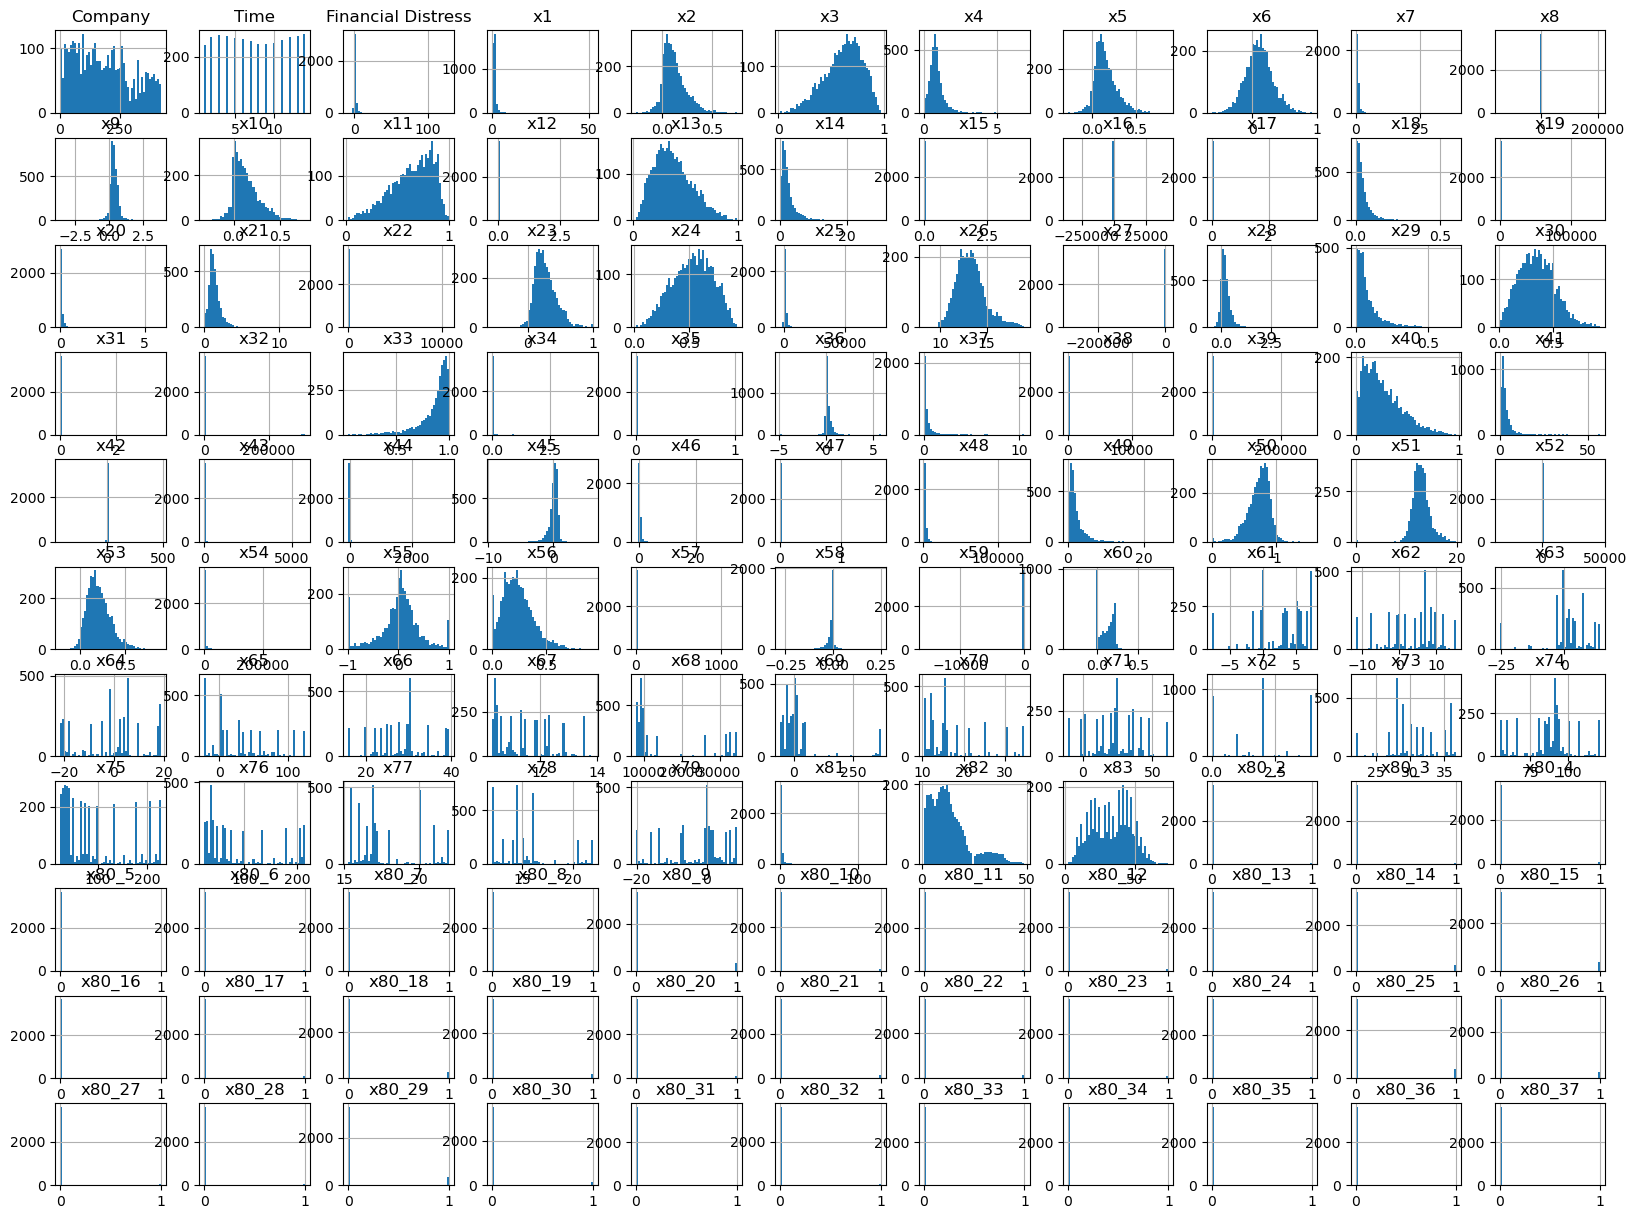

In [11]:
# Histograma
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Separamos características (X) y variable objetivo (y)
X = df.drop(columns=['Financial Distress'])
y = df['Financial Distress']

In [13]:
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Identificamos las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Aplicamos Min-Max Scaler solo a las columnas numéricas
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [15]:
X_train.head()

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x80_28,x80_29,x80_30,x80_31,x80_32,x80_33,x80_34,x80_35,x80_36,x80_37
978,0.199525,0.769231,0.057207,0.366036,0.716236,0.133448,0.500120,0.770635,0.029055,0.409605,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1146,0.237530,0.769231,0.020099,0.349443,0.774809,0.166028,0.441132,0.459251,0.019673,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3543,0.950119,0.769231,0.069646,0.614493,0.174373,0.089234,0.681959,0.700212,0.054946,0.409606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3468,0.921615,0.076923,0.026187,0.352970,0.645300,0.034535,0.373442,0.577801,0.034290,0.409606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2494,0.558195,0.923077,0.028450,0.406921,0.565633,0.289543,0.568935,0.592911,0.005940,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_test.head()

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x80_28,x80_29,x80_30,x80_31,x80_32,x80_33,x80_34,x80_35,x80_36,x80_37
2154,0.479810,0.615385,0.026551,0.294118,0.671367,0.139165,0.332601,0.549971,0.023467,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,0.622328,0.307692,0.018212,0.291307,0.905342,0.123495,0.409991,0.413620,0.013027,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1632,0.349169,0.076923,0.016506,0.342741,0.728229,0.114144,0.460548,0.382989,0.012284,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.444181,0.230769,0.038928,0.285897,0.358126,0.078931,0.296673,0.640596,0.022240,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3248,0.847981,0.461538,0.031746,0.399649,0.605688,0.185119,0.477956,0.635305,0.022964,0.409605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predice en el conjunto de prueba
y_pred = model.predict(X_test)


In [19]:
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 40.8306394632609
R-squared (R2): -15.422344551064754


In [21]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [22]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [23]:
# Configuramos GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [24]:
#  Grid Search para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [25]:
# Imprimimos los mejores parámetros encontrados
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'copy_X': True, 'fit_intercept': False}


In [26]:
# Usamos el mejor modelo encontrado para predecir en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [27]:
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 60.09298612867226
R-squared (R2): -23.169783679126233


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Entrenamos el modelo de Random Forest
rand_for = RandomForestRegressor(random_state=42)
rand_for.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predicciones en el conjunto de prueba
y_pred_for = rand_for.predict(X_test)

In [30]:
# Evaluamos el modelo
mse_rf = mean_squared_error(y_test, y_pred_for)
r2_rf = r2_score(y_test, y_pred_for)

print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)


Mean Squared Error (MSE): 1.1107280126609018
R-squared (R2): 0.5532580834828795


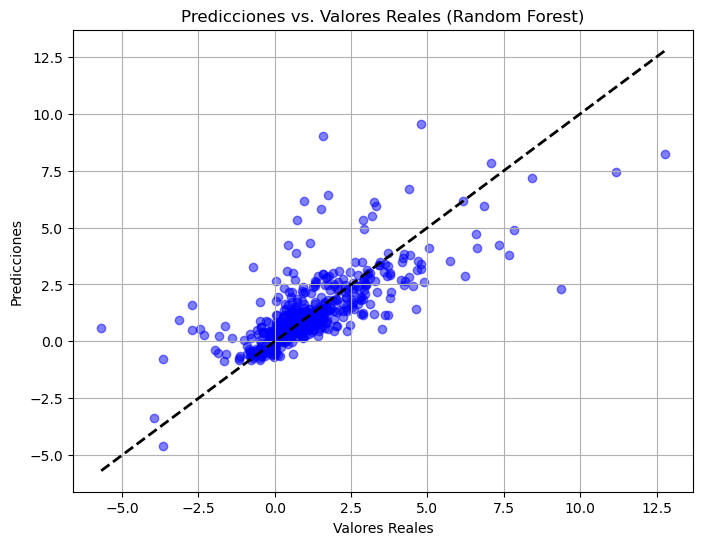

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_for, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Random Forest)')
plt.grid(True)
plt.show()

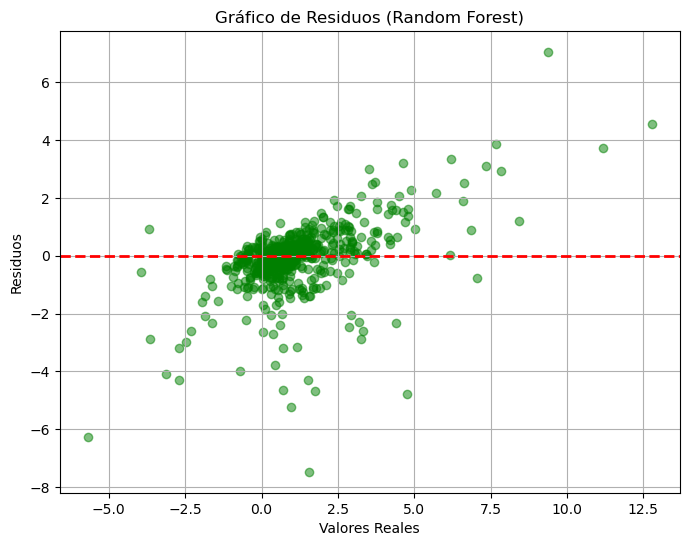

In [32]:
residuals = y_test - y_pred_for

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

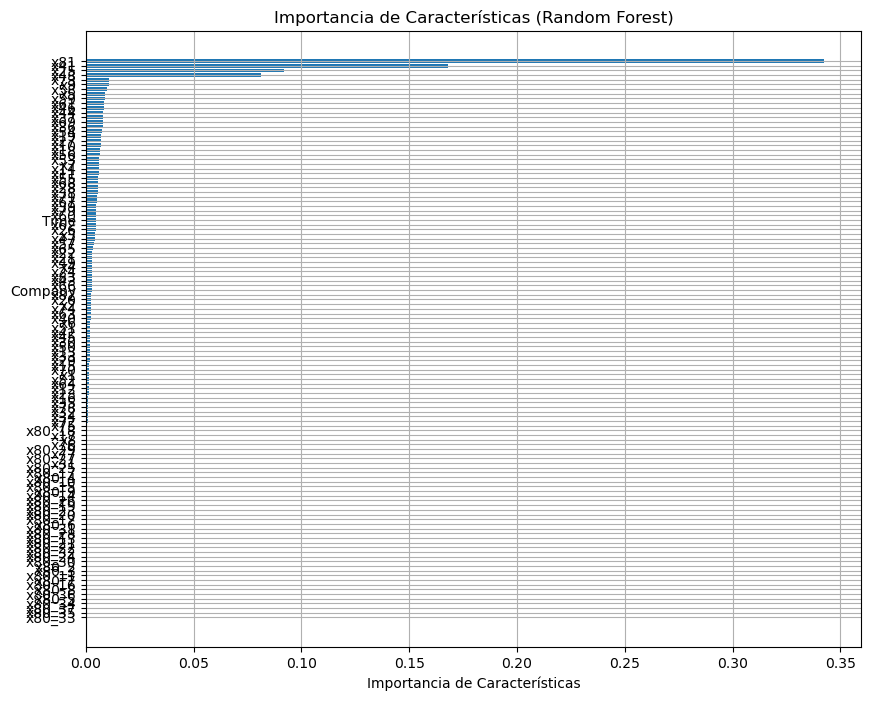

In [33]:
feature_importances = rand_for.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 8))
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importancia de Características')
plt.title('Importancia de Características (Random Forest)')
plt.grid(True)
plt.show()

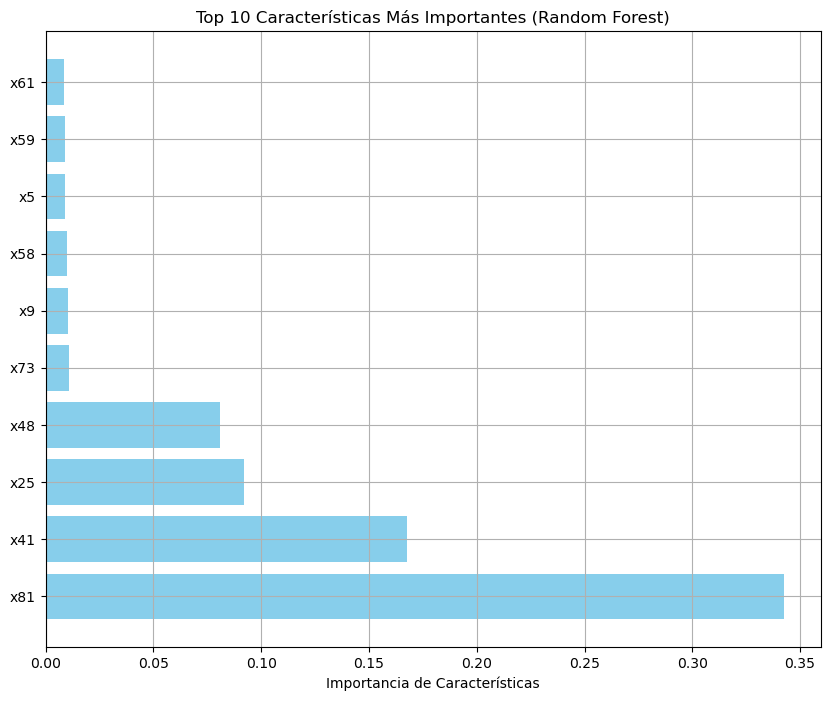

In [34]:
import matplotlib.pyplot as plt

# Obtenemos la importancia de las características y los nombres de las características
feature_importances = rand_for.feature_importances_
feature_names = X.columns

# Creamos un DataFrame con la importancia de características
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenamos el DataFrame por importancia de características de mayor a menor
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Seleccionamos las 10 características más importantes
top_10_features = df_importances.head(10)

# Gráfico de barras horizontales de las 10 características más importantes
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], align='center', color='skyblue')
plt.xlabel('Importancia de Características')
plt.title('Top 10 Características Más Importantes (Random Forest)')
plt.grid(True)
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
cv_scores = cross_val_score(rand_for, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())

Cross-Validation R-squared scores: [0.63392635 0.47547129 0.4538089  0.11914608 0.58020046]
Mean Cross-Validation R-squared: 0.4525106162047933


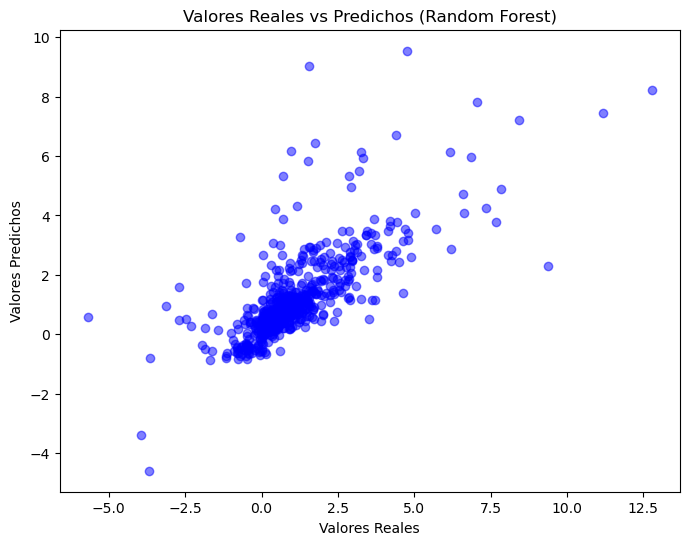

In [36]:
# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_for, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos (Random Forest)')
plt.show()


In [37]:
# Coeficientes de las características
coeficients = model.coef_
feature_names = X.columns



In [38]:
df_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeficients})

# DataFrame con los coeficientes
print("Coeficientes de las características:")
print(df_coef)

Coeficientes de las características:
     Feature   Coefficient
0    Company      0.186076
1       Time     -1.994556
2         x1      3.071734
3         x2      8.300888
4         x3 -24303.472807
..       ...           ...
115   x80_33     -1.775994
116   x80_34     -0.979247
117   x80_35      1.198260
118   x80_36     -3.012911
119   x80_37      0.624839

[120 rows x 2 columns]


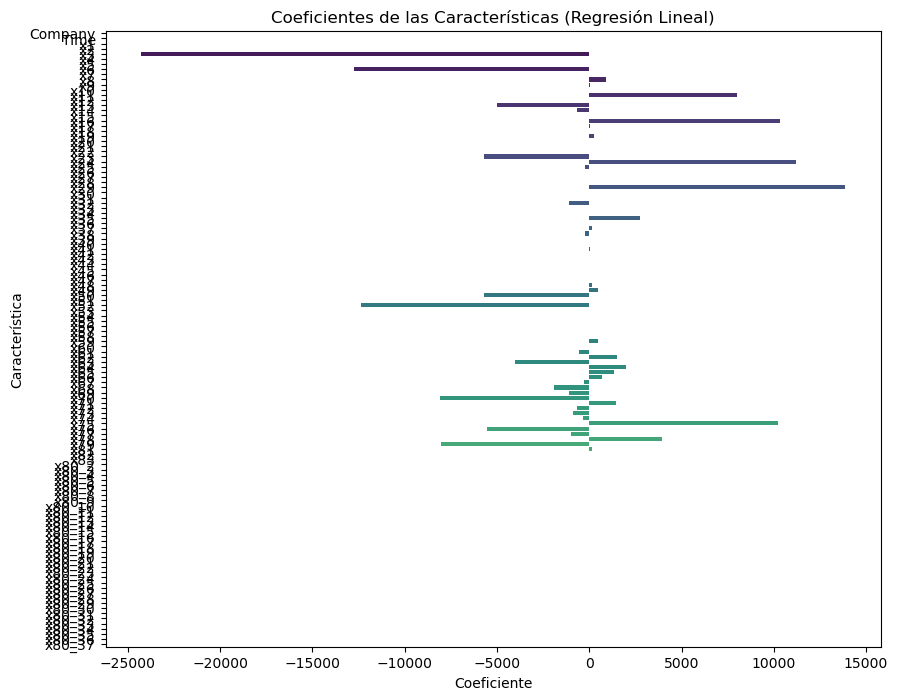

In [39]:
# Gráfico de Coeficientes de Características 
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=df_coef, palette='viridis')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Coeficientes de las Características (Regresión Lineal)')
plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenas modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_gb = model_gb.predict(X_test)

# Evaluamos el modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)


Gradient Boosting:
Mean Squared Error (MSE): 1.3621170307646024
R-squared (R2): 0.4521478112480416


In [41]:
#### Lazy regressor

In [42]:
#from lazypredict.Supervised import LazyRegressor

# Utiliza LazyRegressor
#lazyreg = LazyRegressor(predictions=True, random_state=42)
#models, predictions = lazyreg.fit(X_train, X_test, y_train, y_test)

# Muestra los modelos y sus rendimientos
#print(models)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [43]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Definimos y evaluamos los modelos manualmente
models = [
    ('SVR', SVR()),
    ('Neural Network', MLPRegressor(random_state=42, max_iter=1000))
]

# Entrenamos y evaluamos cada modelo
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_mix = model.predict(X_test)
    r2_mix = r2_score(y_test, y_pred)
    mse_mix = mean_squared_error(y_test, y_pred_mix)
    print(f'{name}:')
    print(f'R-squared (R2) = {r2_mix:.3f}')
    print(f'Mean Squared Error (MSE) = {mse_mix:.3f}')
    print('------------------------')

SVR:
R-squared (R2) = -23.170
Mean Squared Error (MSE) = 1.318
------------------------
Neural Network:
R-squared (R2) = -23.170
Mean Squared Error (MSE) = 2.719
------------------------


In [44]:
#pip install tpot


In [45]:
from tpot import TPOTRegressor

# X_train, X_test, y_train, y_test ya están definidos
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.411903297225507

Generation 2 - Current best internal CV score: -6.35713719559685

Generation 3 - Current best internal CV score: -6.35713719559685

Generation 4 - Current best internal CV score: -6.35713719559685

Generation 5 - Current best internal CV score: -6.35713719559685

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=16, min_samples_split=13, n_estimators=100)


TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)

In [46]:
# Evaluamos el modelo TPOT
y_pred_tpot = tpot.predict(X_test)
r2_tpot = r2_score(y_test, y_pred_tpot)
mse_tpot = mean_squared_error(y_test, y_pred_tpot)

print("Resultados TPOT:")
print(f"R-squared (R2): {r2_tpot:.3f}")
print(f"Mean Squared Error (MSE): {mse_tpot:.3f}")

# mejor pipeline encontrado por TPOT
print("Mejor pipeline encontrado por TPOT:")
print(tpot.fitted_pipeline_)

Resultados TPOT:
R-squared (R2): 0.430
Mean Squared Error (MSE): 1.418
Mejor pipeline encontrado por TPOT:
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.8, min_samples_leaf=16,
                                       min_samples_split=13,
                                       random_state=42))])


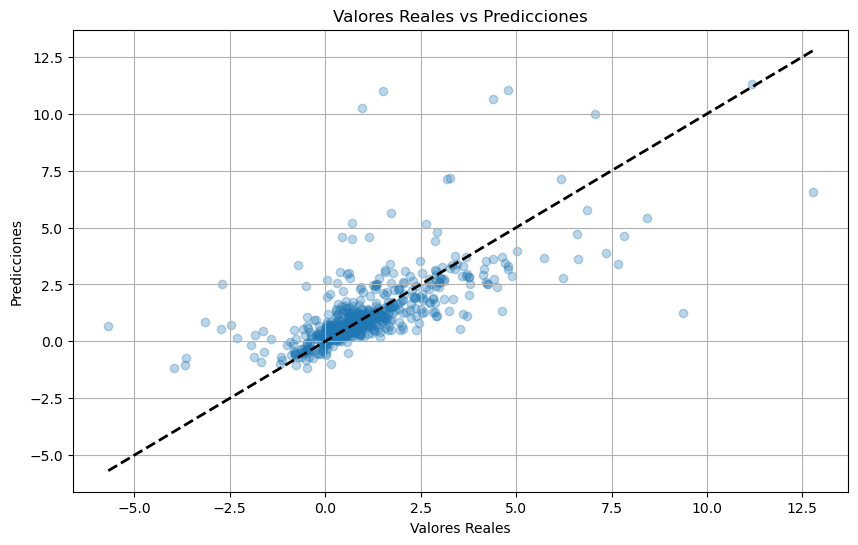

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tpot, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.grid(True)
plt.show()


In [48]:
# Realizamos validación cruzada
cv_scores_tpot = cross_val_score(tpot.fitted_pipeline_, X, y, cv=5, scoring='r2')
print(f'Scores de validación cruzada: {cv_scores_tpot}')
print(f'R2 promedio de validación cruzada: {cv_scores_tpot.mean()}')

Scores de validación cruzada: [0.59624787 0.37437544 0.49420366 0.11759645 0.66064491]
R2 promedio de validación cruzada: 0.448613664889701


In [49]:
import joblib

# Guardamos el modelo en un archivo
joblib.dump(tpot.fitted_pipeline_, 'best_tpot_pipeline.pkl')

# Para cargar el modelo más tarde:
# loaded_model = joblib.load('best_tpot_pipeline.pkl')

['best_tpot_pipeline.pkl']

In [ ]:
# Vamos a realizar un PCA

In [50]:
from sklearn.decomposition import PCA

# Aplicamos PCA a los datos de entrenamiento
pca = PCA(n_components=0.95)  # Retiene el 95% de la varianza
X_train_pca = pca.fit_transform(X_train)

# Transformamos los datos de prueba usando el PCA ajustado a los datos de entrenamiento
X_test_pca = pca.transform(X_test)

# cantidad de componentes seleccionados y la varianza explicada acumulada
print(f'Número de componentes seleccionados: {pca.n_components_}')
print(f'Varianza explicada acumulada: {np.sum(pca.explained_variance_ratio_)}')


Número de componentes seleccionados: 37
Varianza explicada acumulada: 0.952212747589698


In [51]:
# Entrenamos el modelo de Random Forest
rand_for_pca = RandomForestRegressor(random_state=42)
rand_for_pca.fit(X_train_pca, y_train)

# Predicción en el conjunto de prueba
y_pred_pca = rand_for_pca.predict(X_test_pca)

# Evaluamos el modelo
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("Mean Squared Error (MSE) después de PCA:", mse_pca)
print("R-squared (R2) después de PCA:", r2_pca)


Mean Squared Error (MSE) después de PCA: 1.5987690637266558
R-squared (R2) después de PCA: 0.3569648487693444


In [52]:
# Entrenamos el modelo Gradient Boosting
grad_for_pca = GradientBoostingRegressor(random_state=42)
grad_for_pca.fit(X_train_pca, y_train)

# Predicción en el conjunto de prueba
y_pred_pca = grad_for_pca.predict(X_test_pca)

# Evaluamos el modelo
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("Mean Squared Error (MSE) después de PCA:", mse_pca)
print("R-squared (R2) después de PCA:", r2_pca)

Mean Squared Error (MSE) después de PCA: 1.5238459692194632
R-squared (R2) después de PCA: 0.38709939696656825


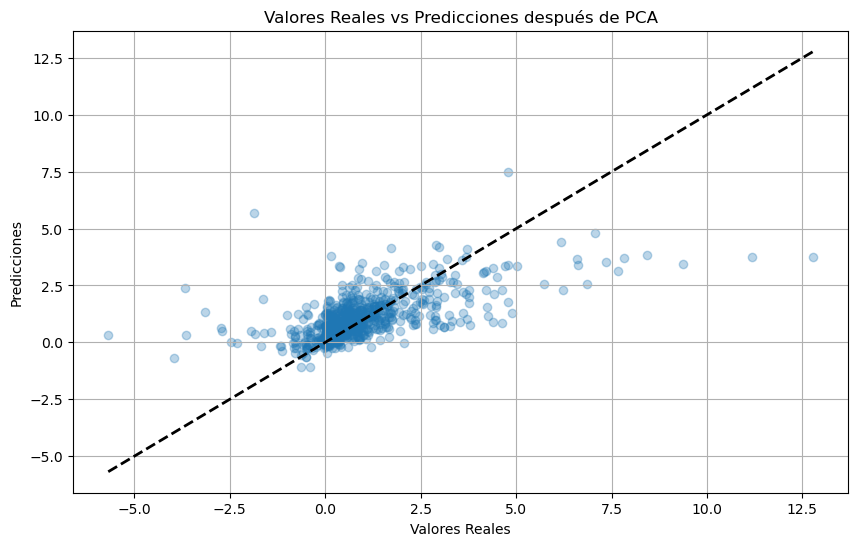

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones después de PCA')
plt.grid(True)
plt.show()

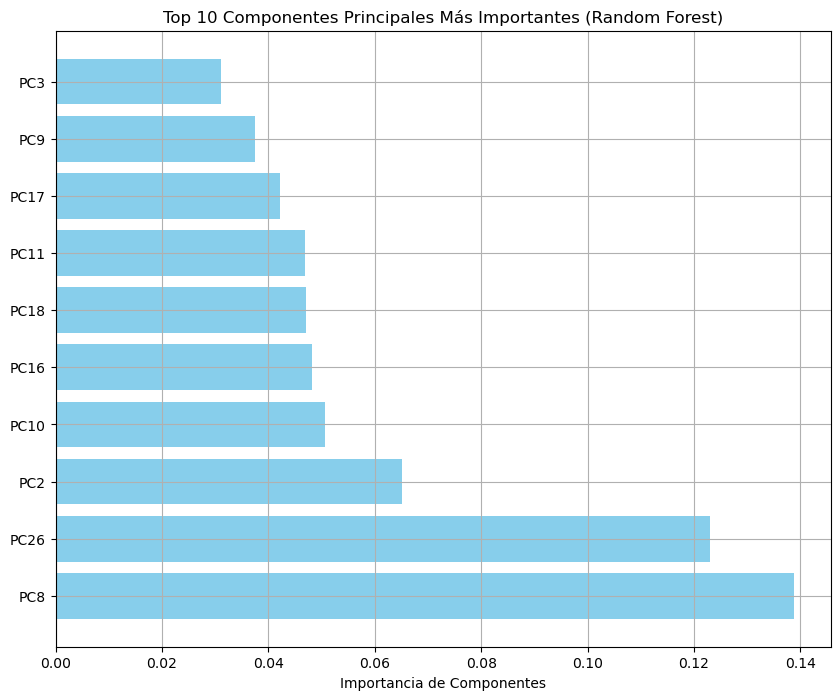

   Component  Importance
7        PC8        0.14
25      PC26        0.12
1        PC2        0.07
9       PC10        0.05
15      PC16        0.05
17      PC18        0.05
10      PC11        0.05
16      PC17        0.04
8        PC9        0.04
2        PC3        0.03


In [54]:
# Obtenemos la importancia de las componentes principales del modelo de Random Forest
feature_importances_pca = rand_for_pca.feature_importances_

# Creamos un DataFrame con la importancia de las componentes principales
df_importances_pca = pd.DataFrame({'Component': [f'PC{i+1}' for i in range(len(feature_importances_pca))], 
                                   'Importance': feature_importances_pca})
df_importances_pca = df_importances_pca.sort_values(by='Importance', ascending=False)

# Seleccionamos las 10 componentes principales más importantes
top_10_components = df_importances_pca.head(10)

# Graficamos la importancia de las componentes principales
plt.figure(figsize=(10, 8))
plt.barh(top_10_components['Component'], top_10_components['Importance'], align='center', color='skyblue')
plt.xlabel('Importancia de Componentes')
plt.title('Top 10 Componentes Principales Más Importantes (Random Forest)')
plt.grid(True)
plt.show()

# DataFrame de las componentes principales más importantes
print(top_10_components)


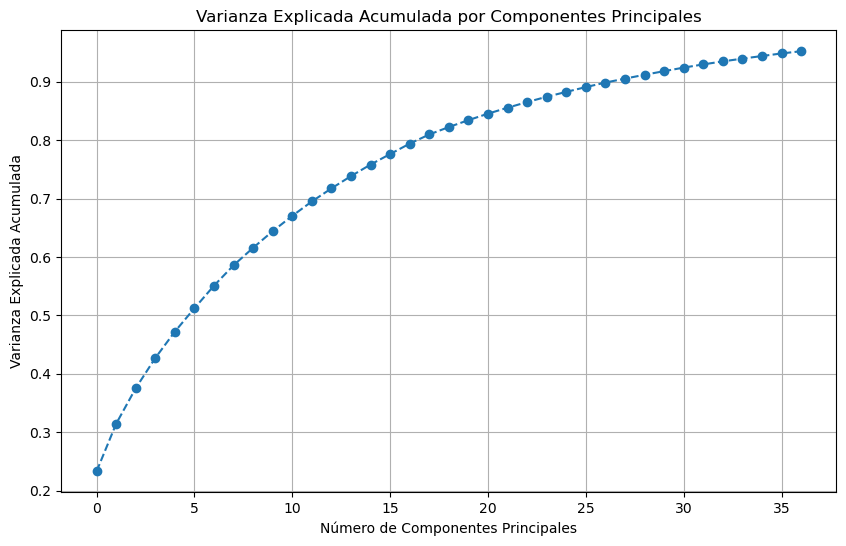

In [55]:
# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()


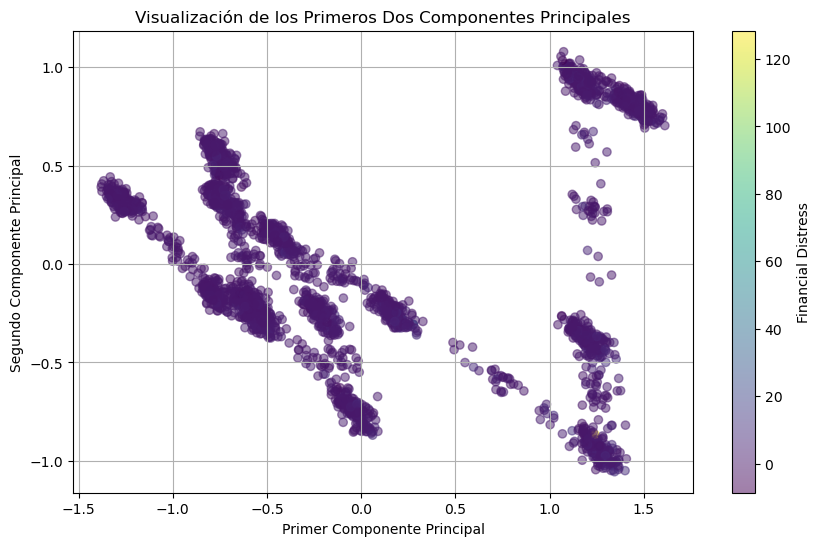

In [56]:
# Visualización de los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Financial Distress')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización de los Primeros Dos Componentes Principales')
plt.grid(True)
plt.show()


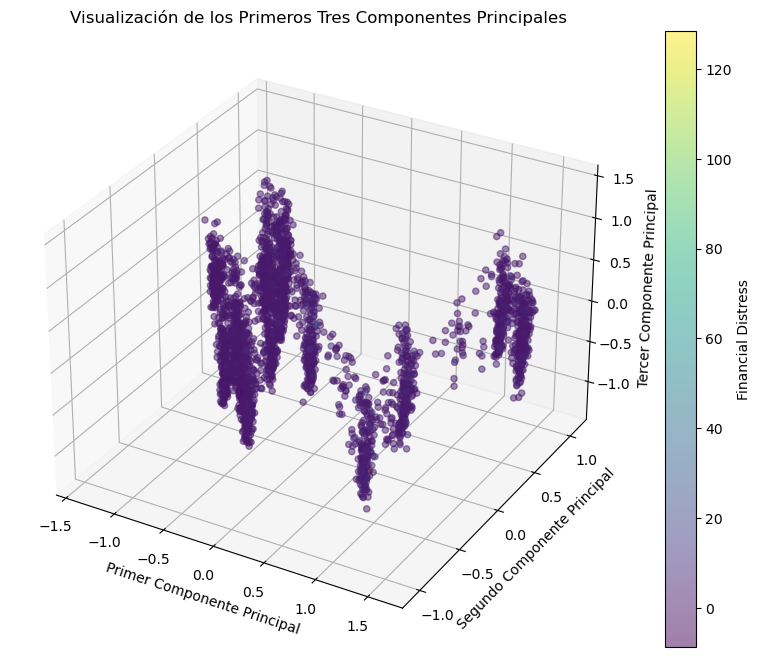

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Visualización de los primeros tres componentes principales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Financial Distress')
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_zlabel('Tercer Componente Principal')
ax.set_title('Visualización de los Primeros Tres Componentes Principales')
plt.show()


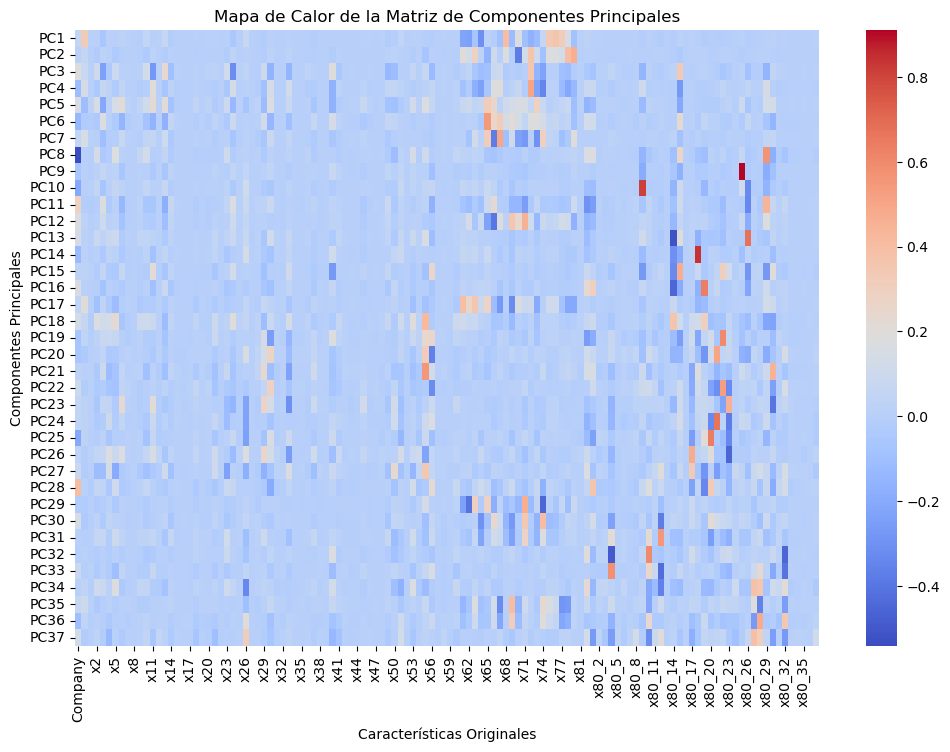

In [59]:
# DataFrame con las componentes principales
df_pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Mapa de calor de la matriz de componentes principales
plt.figure(figsize=(12, 8))
sns.heatmap(df_pca_components, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Mapa de Calor de la Matriz de Componentes Principales')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.show()

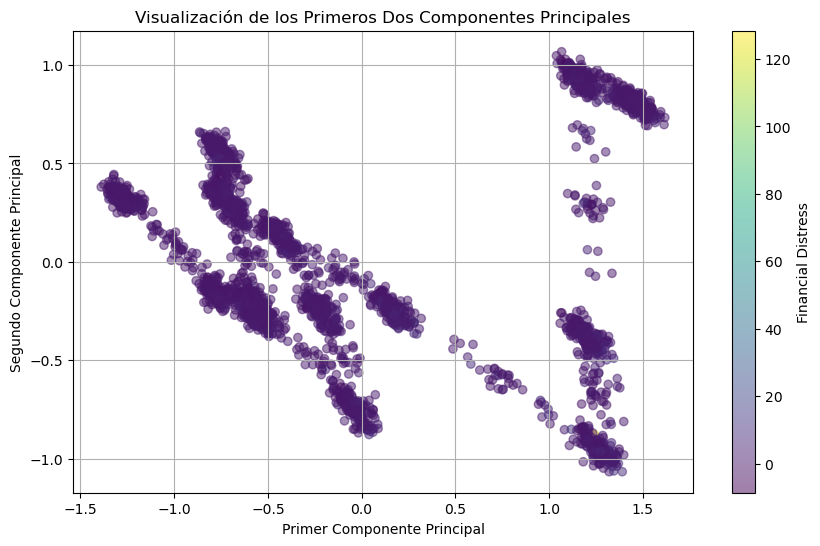

In [60]:
# Visualización de los primeros dos componentes principales con jittering
jitter = 0.01
X_train_pca_jittered = X_train_pca + np.random.normal(0, jitter, X_train_pca.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca_jittered[:, 0], X_train_pca_jittered[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Financial Distress')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización de los Primeros Dos Componentes Principales')
plt.grid(True)
plt.show()


SERIES TEMPORALES:



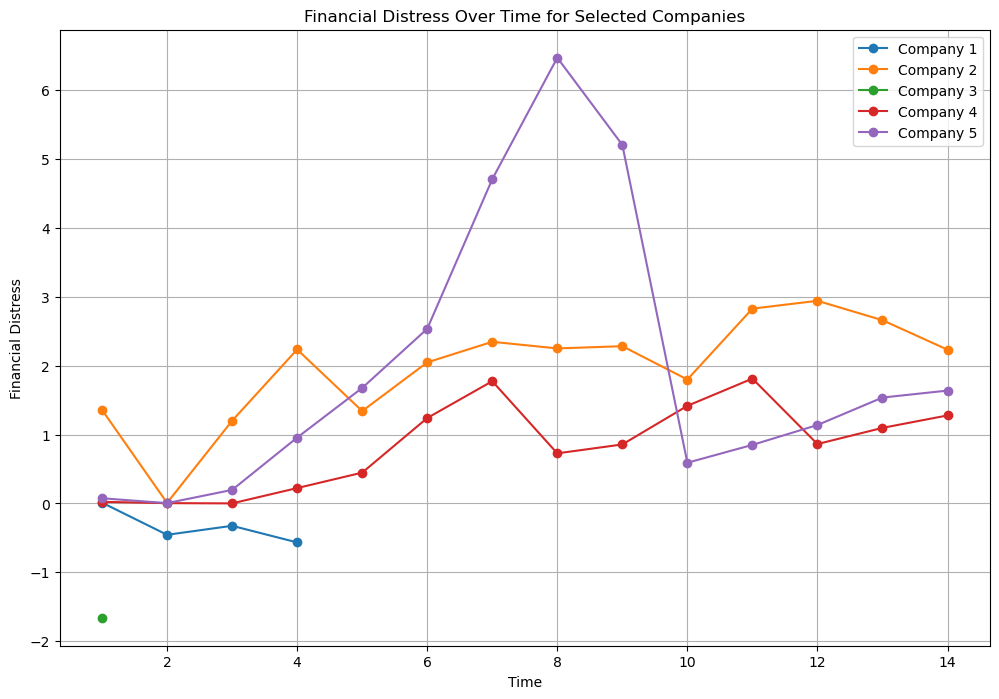

In [62]:
# Seleccionamos algunas compañías para visualizar
companies_to_plot = df['Company'].unique()[:5]

plt.figure(figsize=(12, 8))

for company in companies_to_plot:
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Time'], company_data['Financial Distress'], marker='o', label=f'Company {company}')

plt.xlabel('Time')
plt.ylabel('Financial Distress')
plt.title('Financial Distress Over Time for Selected Companies')
plt.legend()
plt.grid(True)
plt.show()

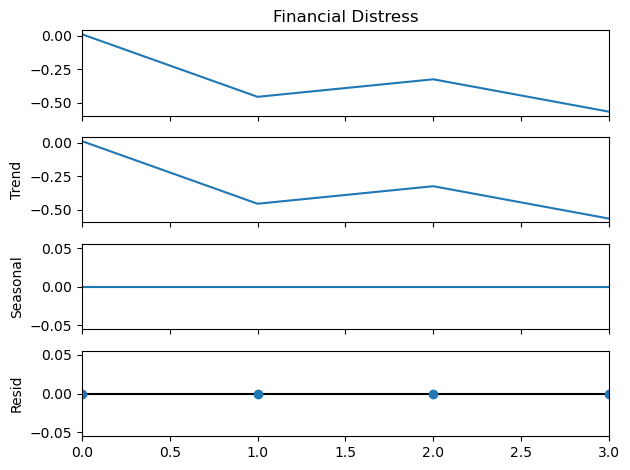

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seleccionamos una compañía para descomponer su serie temporal
company_data = df[df['Company'] == companies_to_plot[0]].sort_values(by='Time')

result = seasonal_decompose(company_data['Financial Distress'], model='additive', period=1)
result.plot()
plt.show()


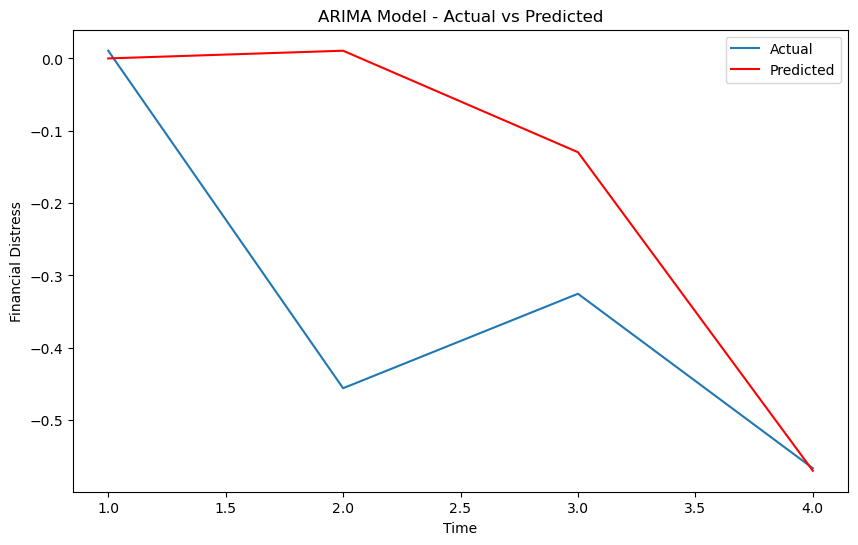

In [64]:
# Modelo Arima

from statsmodels.tsa.arima.model import ARIMA

# Seleccionamos una compañía para modelar su serie temporal
company_data = df[df['Company'] == companies_to_plot[0]].sort_values(by='Time')

# Ajustamos el modelo ARIMA
model = ARIMA(company_data['Financial Distress'], order=(1, 1, 1))
model_fit = model.fit()

# Predicciones
predictions = model_fit.predict(start=0, end=len(company_data)-1, dynamic=False)
plt.figure(figsize=(10, 6))
plt.plot(company_data['Time'], company_data['Financial Distress'], label='Actual')
plt.plot(company_data['Time'], predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Financial Distress')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


In [67]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/6b/3c/79d6da1af2a9bd6a534c5a283271eff1bdd673241cda795919a2b41578b3/prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/7b/ac/034c669a23438b6d5a2d42d3d73ddad8439fc8b7057a884e4639cb2698f9/holidays-0.52-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98

In [70]:
df['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [71]:
df.tail()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x80_28,x80_29,x80_30,x80_31,x80_32,x80_33,x80_34,x80_35,x80_36,x80_37
3667,422,10,0.44,2.26,0.20,0.16,0.19,0.18,0.20,2.22,...,0,0,0,0,0,0,0,0,0,1
3668,422,11,0.48,1.96,0.22,0.20,0.22,0.20,0.19,1.94,...,0,0,0,0,0,0,0,0,0,1
3669,422,12,0.50,1.71,0.21,0.26,0.21,0.19,0.18,1.69,...,0,0,0,0,0,0,0,0,0,1
3670,422,13,0.61,1.56,0.19,0.31,0.19,0.17,0.17,1.54,...,0,0,0,0,0,0,0,0,0,1
3671,422,14,0.52,1.61,0.18,0.36,0.18,0.17,0.20,1.58,...,0,0,0,0,0,0,0,0,0,1


11:22:41 - cmdstanpy - INFO - Chain [1] start processing
11:22:43 - cmdstanpy - INFO - Chain [1] done processing


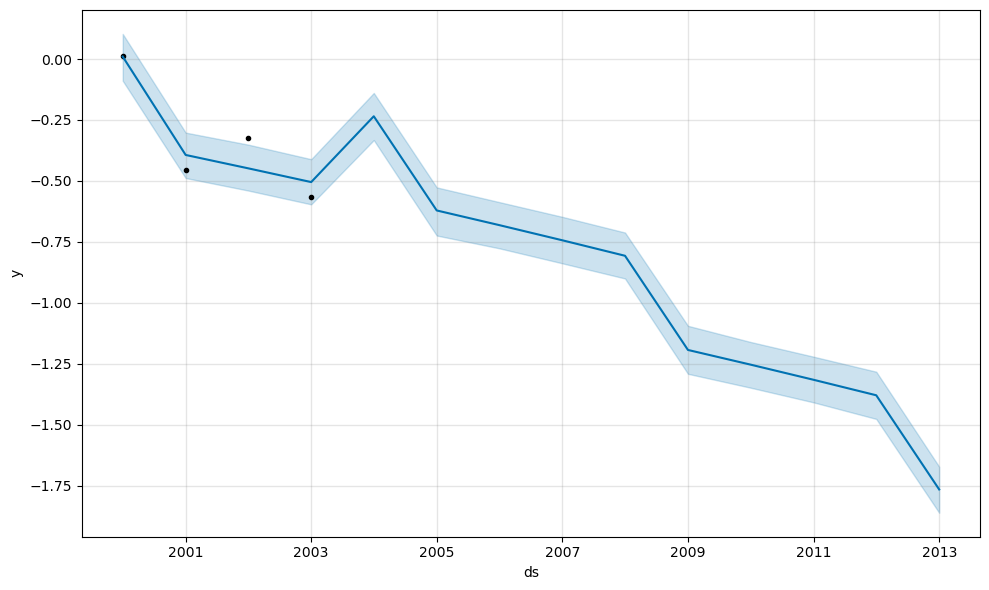

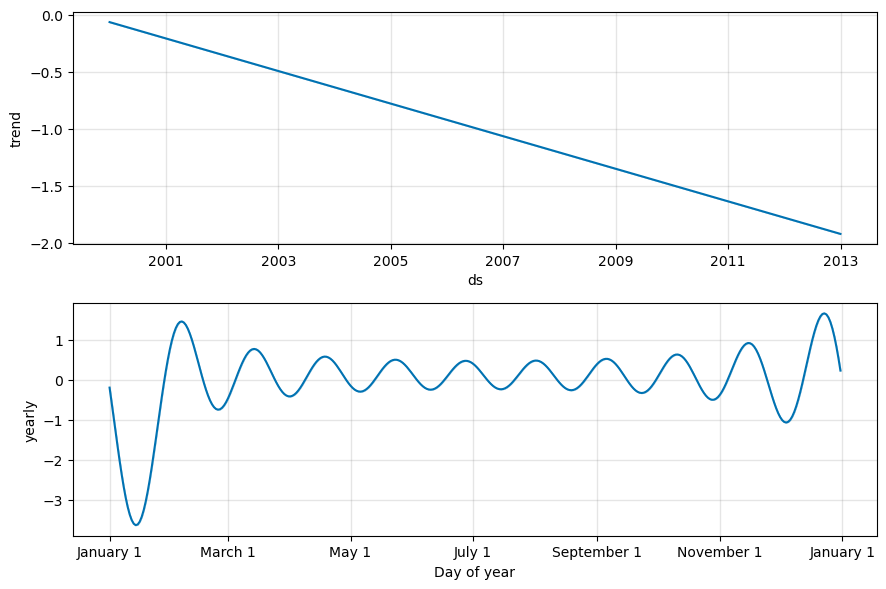

In [72]:

import pandas as pd
from prophet import Prophet

# Supongamos que el año base es 2000
base_year = 2000
df['Time'] = pd.to_datetime(df['Time'] + base_year - 1, format='%Y')

# Seleccionamos los datos de una empresa específica para análisis de series temporales
company_data = df[df['Company'] == df['Company'].unique()[0]][['Time', 'Financial Distress']].rename(columns={'Time': 'ds', 'Financial Distress': 'y'})

# Ajustamos el modelo Prophet
model = Prophet()
model.fit(company_data)

# Predicciones
future = model.make_future_dataframe(periods=10, freq='Y')  # Predicción a 10 años
forecast = model.predict(future)

# Visualización
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
